# Simple linear regression

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
# We can override the default matplotlib styles with those of Seaborn
#import seaborn as sns
#sns.set()

#statsmeodels is the library you will use when running REGRESSIONS

## Load the data

In [2]:
# Load the data from a .csv in the same folder

data = pd.read_csv('1.01. Simple linear regression.csv')

In [3]:
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [4]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


the method **object.describe()** is a pandas method that gives you the most useful descriptive statistics for each column in the dataframe

# Create your first regression

remember the Linear Regression Equation. Slide #3

## Define the dependent and the independent variables

In [5]:
y = data['GPA'] #dependent variable y hat
x1 = data['SAT']

## Explore the data

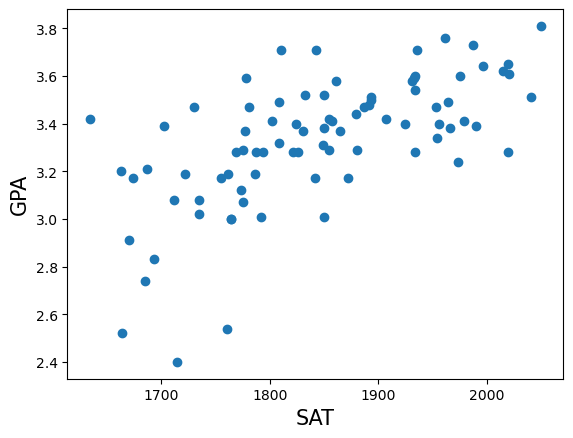

In [6]:
plt.scatter(x1,y)
plt.xlabel('SAT', fontsize=15)
plt.ylabel('GPA', fontsize=15)
plt.show()

The higher the SAT, the higer the GPA

## Regression itself


Linear Regression Equation


**ŷ (Y hat) = b0 + b1 * x1**


Now we need to create a new variable, which we call X. We have our x1, but we don't have an x0 **(references to our b0)**. In fact, in our regression equation, there is no explicit xO. The coefficient B0 is alone. That can be represented as B0 * 1, right? So if there was an x0, it would always be one. It is really practical for computational purposes to incorporate this notion into the equation, and **that's how we estimate the intercept B zero.**


In terms of code, stats models uses the method add constant. So let's declare a new variable

In [7]:
# Add a constant. Essentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(x1)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y 
#and an idependent x. The fit method, which you can think of as a method that will apply a specific estimation
#technique to obtain the fit of the model.
results = sm.OLS(y,x).fit()
# Print a nice summary of the regression. That's one of the strong points of statsmodels -> the summaries
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Fri, 12 Jul 2024   Prob (F-statistic):           7.20e-11
Time:                        16:17:11   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The **std err** in the table, shows the accuracy of prediction for each variable. The lower the standard error, the better the estimate. 

The “coef” (coefficient), “const” (constant) (and bias) are used interchangeably

t -- t-statistic 
P>|t| --  p-value

In the t-statistic, a hypothesis involved. In this example, the null hypothesis of this test is H0: B0 = 0 (is the coefficient equal to zero?). If a coefficient is 0 for the intercept, B0 that is, then the line crosses the Y axis at the origin (0,0). If B1 =  0, then 0 * X will always be zero for any X. Graphically, that would mean that the regression line is horizontal, always going through the intercept value.To paraphrase this test it basically asks if this is a useful variable? Does it help us explain the variability we have in this case? **The answer is contained in the P-value column**

A p-value of **BELOW 0.05** means that the variable is **SIGNIFICANT**. Therefore, the coefficient is most probably different from zero. Moreover, we are longing to see those three zeros. In the SAT example, **the p-value is telling us that the SAT score is a significant variable when predicting college GPA.** SAT has a p-value of 0.000


Looking at the table, the intercept p-value (which is **0.503**) us not zero. This test is asking the question, do we have enough statistical evidence that the intercept differs from zero? Graphically, that would mean that the regression line passes through the origin of the graph (0,0). Usually, this is not essential as it is the causal relationship of the Xs we are interested in.

**For the SAT/GPA example, the SAT score got an R-Square of 0.406 or 41% meaning that SAT scores explains 41% of the variability of the GPAs in the sample. This score is neither good or bad. We may conclude that there are other variables that must be accounted for like gender, income, marital status, and etc. Such variables could help us understand the full picture**

 Origin of a graph is (0,0)
 
 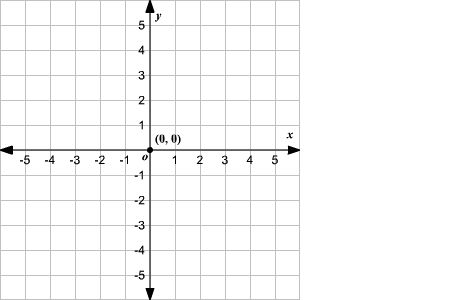

A **p-value of 0.503** suggests that the intercept coefficient is **NOT SIGINIFICANTLY DIFFERENT** from 0. 

A **p-value of 0.000** suggests that the coefficient (x) (which is the independent variable) is **SIGINIFICANTLY DIFFERENT** from 0. 

**Now we are plotting the regression line on the same scatter plot. Below**

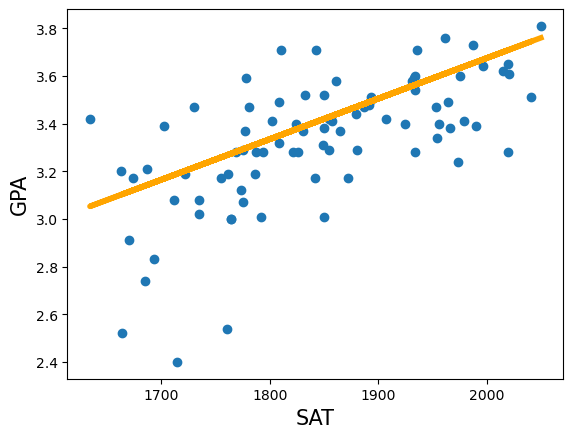

In [8]:
#create scatter plot
plt.scatter(x1,y)

# Define the regression equation, so we can plot it later
#yhat = 0.0017*x1 + 0.275
yhat = .2750 + 0.0017*x1 #THIS IS THE REGRESSION LINE. THE EQUATION CREATES IT. 

# Plot the regression line against the independent variable (SAT)
fig = plt.plot(x1,yhat, lw=4, color='orange', label='regression line') #THIS PLOTS THE LINE ON THE GRAPH

#label the axes
plt.xlabel('SAT', fontsize=15)
plt.ylabel('GPA', fontsize=15)
plt.show()



**The line is called the best fitting line, or in other words, the line which is closest to all observations simultaneously.**